In [9]:
import numpy as np
import torch.nn as nn
import torch

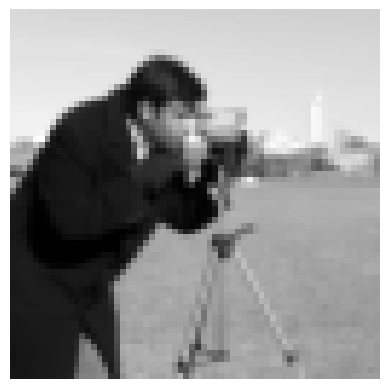

In [13]:
from skimage import data
from skimage.transform import resize

import matplotlib.pyplot as plt

# Load a sample grayscale camera image and resize it to 64x64
camera = data.camera()  # Using a sample grayscale image
camera_resized = resize(camera, (64, 64), anti_aliasing=True)

# Display the image
plt.imshow(camera_resized, cmap='gray')
plt.axis('off')
plt.show()

# Store the image as a matrix
image_matrix = camera_resized

In [33]:
# Tokenize image_matrix into 16x16 patches
patch_size = 16
patches = [
    image_matrix[i:i + patch_size, j:j + patch_size]
    for i in range(0, image_matrix.shape[0], patch_size)
    for j in range(0, image_matrix.shape[1], patch_size)
]

# Convert the list of patches into a NumPy array
patches = np.array(patches)

print(f"Number of patches: {patches.shape[0]}")
print(f"Shape of each patch: {patches[0].shape}")

Number of patches: 16
Shape of each patch: (16, 16)


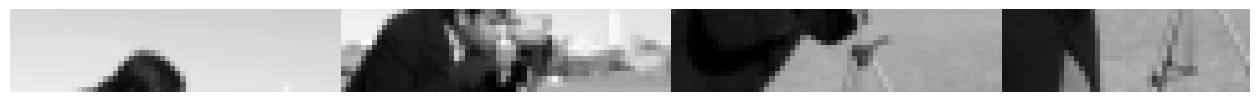

In [39]:
# Reshape patches into a grid of 1 row and 16 columns
grid = np.hstack(patches[:-1])

# Display the grid
plt.figure(figsize=(16, 2))
plt.imshow(grid, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Flatten the patches into a 2D tensor
flattened_patches = torch.tensor(patches.reshape(patches.shape[0], -1), dtype=torch.float32)
print(f"Shape of flattened patches: {flattened_patches.shape}")
# Define a linear layer for projecting the patches
qkv = nn.Linear(
    in_features=flattened_patches.shape[-1],
    out_features=128*3 #128 channels per matrix: query, key, value
 )

proj = nn.Linear( 128, 128 )

B, N, C = x.shape
## Dimensions: (batch, num_tokens, token_len)

## Calcuate QKVs
qkv = qkv(x).reshape(B, N, 3, num_heads, head_dim).permute(2, 0, 3, 1, 4)
#### Dimensions: (3, batch, heads, num_tokens, chan/num_heads = head_dim)
q, k, v = qkv[0], qkv[1], qkv[2]

## Calculate Attention
attn = (q * scale) @ k.transpose(-2, -1)
attn = attn.softmax(dim=-1)
#### Dimensions: (batch, heads, num_tokens, num_tokens)

## Attention Layer
x = (attn @ v).transpose(1, 2).reshape(B, N, chan)
#### Dimensions: (batch, heads, num_tokens, chan)

## Projection Layers
x = proj(x)

## Skip Connection Layer
v = v.transpose(1, 2).reshape(B, N, chan)
x = v + x     

Shape of flattened patches: torch.Size([16, 256])
Linear(in_features=256, out_features=384, bias=True)
